# Import Required Libraries
Import the necessary libraries, including pandas and scikit-learn.

In [65]:
# Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from IPython.display import Markdown
import seaborn as sns
import numpy as np

# Load Dataset
Load the dataset into a pandas DataFrame.

In [66]:
# Load Dataset
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025-1/complete_dataset.csv"  # Replace with your dataset file path
df = pd.read_csv(file_path)  # Load the dataset into a pandas DataFrame

# Display the first few rows of the DataFrame
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


# Handle Missing Values
Identify and handle missing values in the dataset using techniques such as imputation or removal.

In [67]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load Dataset
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025-1/complete_dataset.csv"
df = pd.read_csv(file_path)

# Handle Missing Values

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

df_cleaned = df.fillna(method='ffill').fillna(method='bfill')  # Forward & Backward Fill

# Option 2: Impute missing values
# For numerical columns, fill missing values with the mean
df_imputed = df.copy()
numeric_columns = df.select_dtypes(include=['number']).columns
df_imputed[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# For categorical columns, fill missing values with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df_imputed[column].fillna(df_imputed[column].mode()[0], inplace=True)

# Encode Categorical Variables

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
for column in df_imputed.select_dtypes(include=['object']).columns:
    df_imputed[column] = label_encoder.fit_transform(df_imputed[column])

# Display the first few rows of the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned.head())

# Display the first few rows of the imputed DataFrame
print("Imputed DataFrame:")
print(df_imputed.head())

Missing values in each column:
 date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64
Cleaned DataFrame:
         date      demand        RRP  demand_pos_RRP  RRP_positive  \
0  2015-01-01   99635.030  25.633696       97319.240     26.415953   
1  2015-01-02  129606.010  33.138988      121082.015     38.837661   
2  2015-01-03  142300.540  34.564855      142300.540     34.564855   
3  2015-01-04  104330.715  25.005560      104330.715     25.005560   
4  2015-01-05  118132.200  26.724176      118132.200     26.724176   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809777         0.062500             15.4   
2           0.

C:\Users\saina\AppData\Local\Temp\ipykernel_17632\4286325588.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df.fillna(method='ffill').fillna(method='bfill')  # Forward & Backward Fill
C:\Users\saina\AppData\Local\Temp\ipykernel_17632\4286325588.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[column].fillna(df_imputed[column].mode()[0], inplace=True)


# DEMAND ANALYSIS AND PRICE ANALYSIS


## DAILY DEMAND ANALYSIS

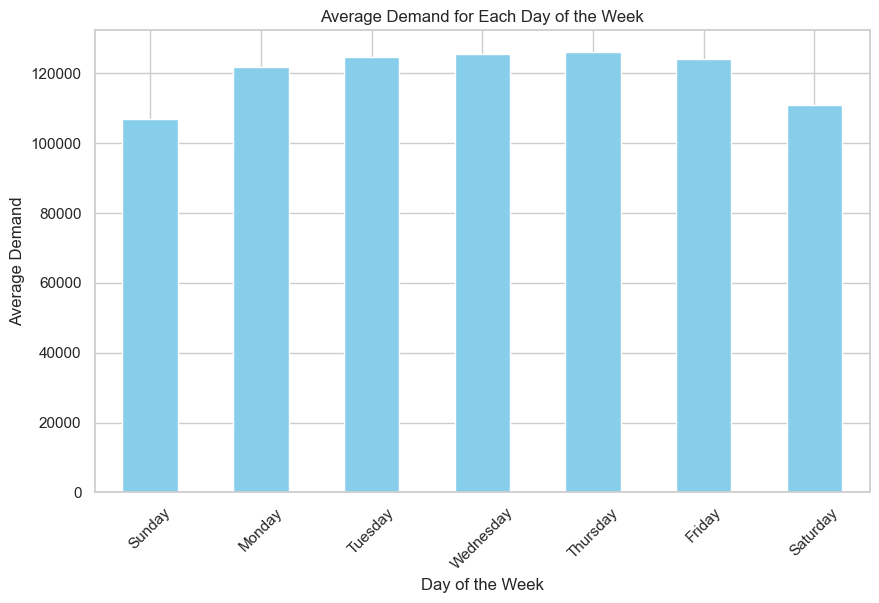

**Daily Demand Analysis:** A bar plot groups the data by the day of the week (Sunday to Saturday) and shows the average demand for each day.

In [68]:
# Demand and Price Analysis
import matplotlib.pyplot as plt
import calendar as cal

# Convert 'date' column to datetime format
import matplotlib.dates as mdates
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

# Add a column for the day of the week
df['day_of_week'] = df.index.day_name()

# Group by day of the week and calculate the average demand
average_demand_by_day = df.groupby('day_of_week')['demand'].mean().reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Plot the average demand for each day of the week
plt.figure(figsize=(10, 6))
average_demand_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Demand for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
display(Markdown("**Daily Demand Analysis:** A bar plot groups the data by the day of the week (Sunday to Saturday) and shows the average demand for each day."))


## Weekly Demand Variations

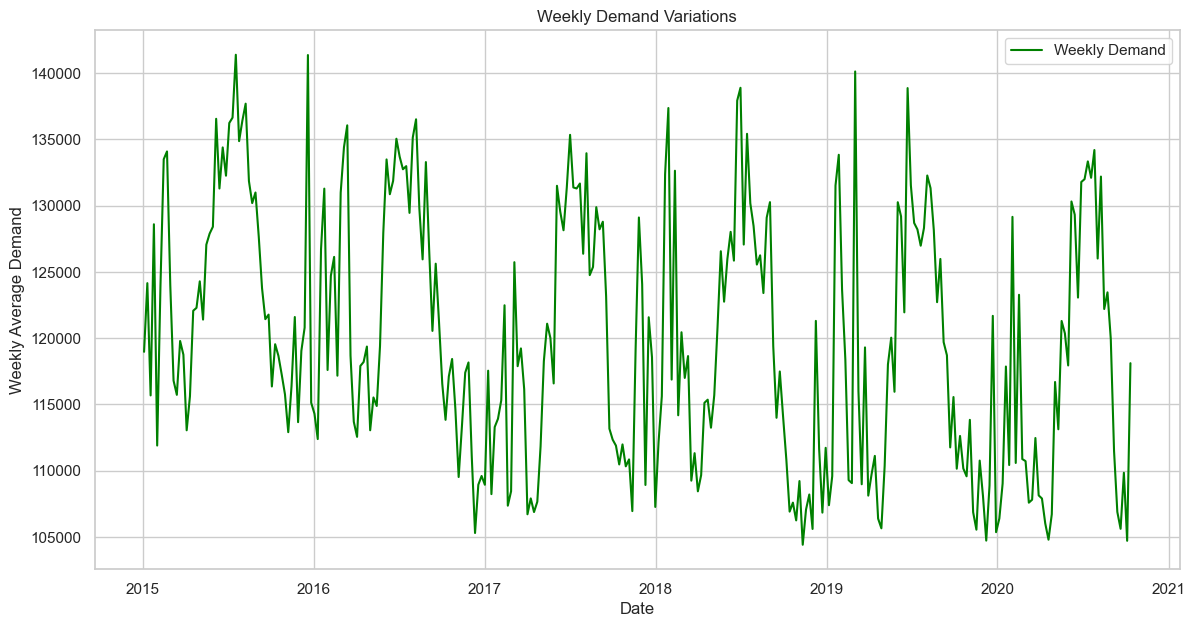

**Weekly Demand Variations:** A line plot that resamples demand data weekly to reveal trends and fluctuations.

In [69]:
# Plot weekly demand variations
weekly_demand = df['demand'].resample('W').mean()
plt.figure(figsize=(14, 7))
plt.plot(weekly_demand, label='Weekly Demand', color='green')
plt.title('Weekly Demand Variations')
plt.xlabel('Date')
plt.ylabel('Weekly Average Demand')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Weekly Demand Variations:** A line plot that resamples demand data weekly to reveal trends and fluctuations."))

## Yearly Demand Variations

C:\Users\saina\AppData\Local\Temp\ipykernel_17632\1418829592.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_demand = df['demand'].resample('Y').mean()


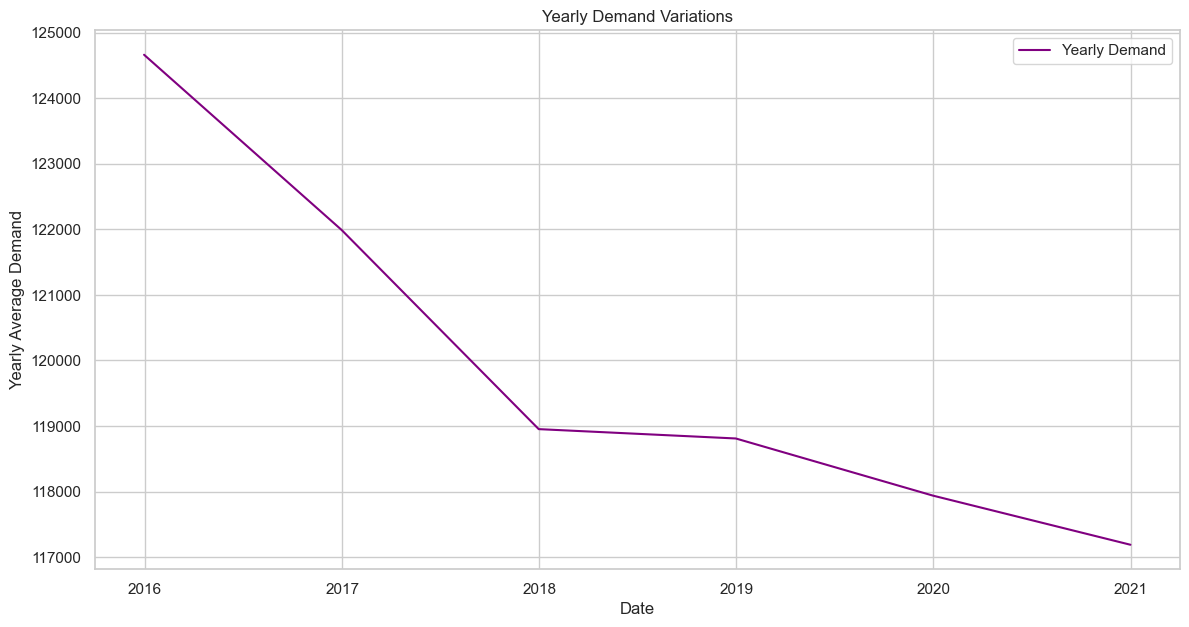

**Yearly Demand Variations:** A line plot aggregating demand by year to highlight long-term trends.

In [70]:
# Plot yearly demand variations
yearly_demand = df['demand'].resample('Y').mean()
plt.figure(figsize=(14, 7))
plt.plot(yearly_demand, label='Yearly Demand', color='purple')
plt.title('Yearly Demand Variations')
plt.xlabel('Date')
plt.ylabel('Yearly Average Demand')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Yearly Demand Variations:** A line plot aggregating demand by year to highlight long-term trends."))


## Demand vs. RRP Relationship

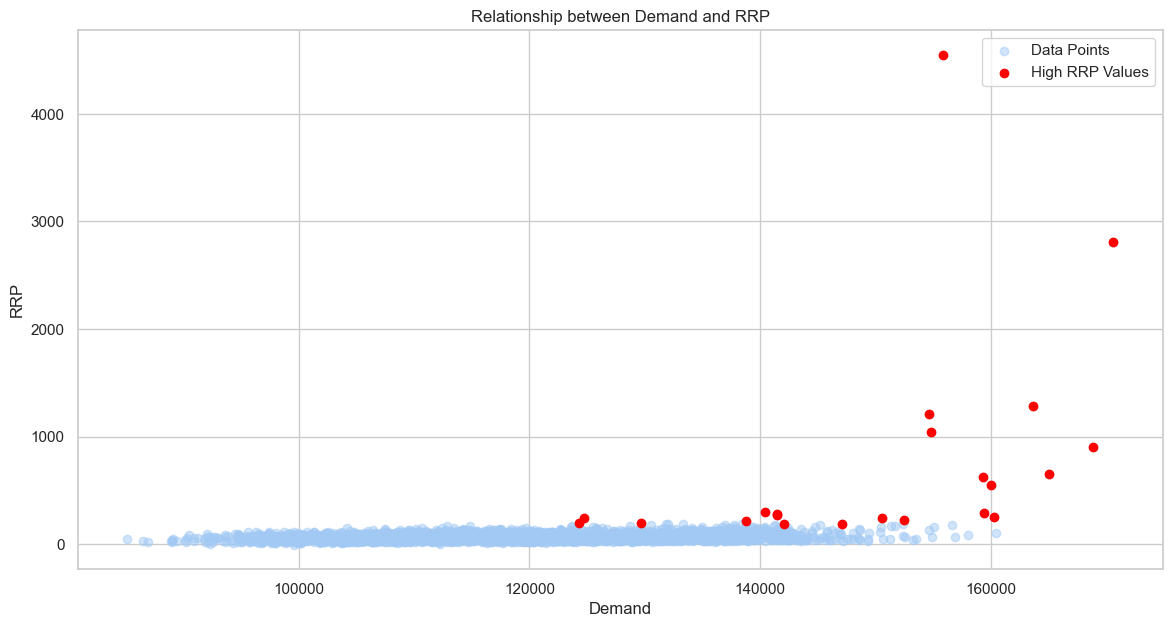

**Demand vs. RRP Relationship:** A scatter plot showing the relationship between demand and RRP with high RRP values (above the 99th percentile) highlighted in red.

In [71]:
# Analyze the relationship between demand and RRP
plt.figure(figsize=(14, 7))

# Identify high RRP values
high_rrp_threshold = df['RRP'].quantile(0.99)
high_rrp = df[df['RRP'] > high_rrp_threshold]

# Plot all data points
plt.scatter(df['demand'], df['RRP'], alpha=0.5, label='Data Points')

# Highlight high RRP values
plt.scatter(high_rrp['demand'], high_rrp['RRP'], color='red', label='High RRP Values')

plt.title('Relationship between Demand and RRP')
plt.xlabel('Demand')
plt.ylabel('RRP')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Demand vs. RRP Relationship:** A scatter plot showing the relationship between demand and RRP with high RRP values (above the 99th percentile) highlighted in red."))


## Monthly Average Demand Analysis

C:\Users\saina\AppData\Local\Temp\ipykernel_17632\674040574.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_demand = df['demand'].resample('M').mean()


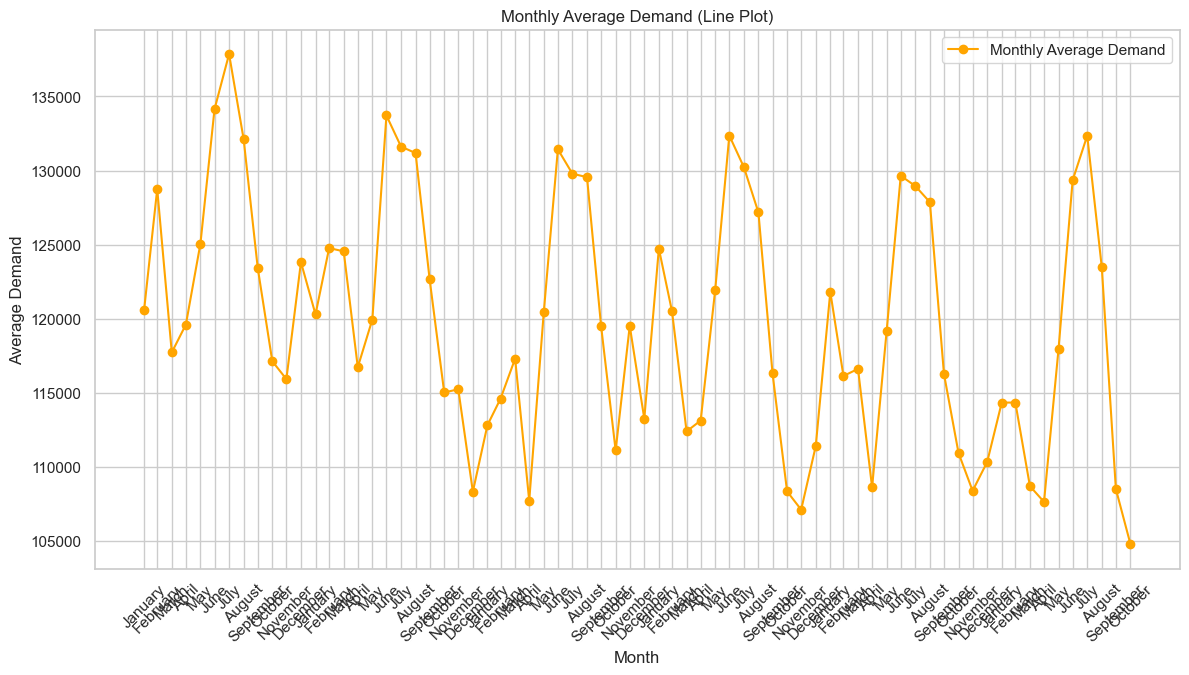

**Monthly Average Demand Analysis:** A line plot representing monthly average demand, displaying seasonal variations throughout the year.

In [72]:
# Plot monthly average demand as a line plot
monthly_demand = df['demand'].resample('M').mean()
plt.figure(figsize=(14, 7))
plt.plot(monthly_demand, marker='o', linestyle='-', color='orange', label='Monthly Average Demand')
plt.title('Monthly Average Demand (Line Plot)')
plt.xlabel('Month')
plt.ylabel('Average Demand')
import calendar
month_names = [calendar.month_name[dt.month] for dt in monthly_demand.index]
plt.xticks(monthly_demand.index, month_names, rotation=45)
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Monthly Average Demand Analysis:** A line plot representing monthly average demand, displaying seasonal variations throughout the year."))

## High Demand and Price Spikes

In [73]:
# Identify periods with high demand and significant price spikes
high_demand = df[df['demand'] > df['demand'].quantile(0.95)]
high_price_spikes = high_demand[high_demand['RRP'] > df['RRP'].quantile(0.95)]
print('Periods with high demand and significant price spikes:')
print(high_price_spikes)

Periods with high demand and significant price spikes:
                demand          RRP  demand_pos_RRP  RRP_positive  \
date                                                                
2015-12-17  152366.300   188.086125      152366.300    188.086125   
2016-01-13  160011.075   545.737820      160011.075    545.737820   
2016-03-08  160285.015   253.032032      160285.015    253.032032   
2016-07-05  142401.795   147.187692      142401.795    147.187692   
2017-02-08  142213.660   135.061279      142213.660    135.061279   
2017-02-09  155060.610   156.699561      151642.620    163.717084   
2017-08-03  151355.430   169.233827      151355.430    169.233827   
2017-11-29  151730.950   166.552647      151730.950    166.552647   
2018-01-18  154648.065  1210.137920      154648.065   1210.137920   
2018-01-19  165070.595   647.574163      165070.595    647.574163   
2018-01-28  159436.690   290.419644      159436.690    290.419644   
2018-02-07  159307.315   624.260934      159307.

# Weather Impact Analysis
### 1. Importing Required Libraries

In [74]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

### 2. Setting Visualization Style

In [75]:
sns.set(style="whitegrid", palette="pastel")

### 3. Removing Extreme Outliers (Excluding Rainfall)

In [76]:
# Function to iteratively remove extreme outliers using IQR method (excluding rainfall)
def remove_extreme_outliers(df, columns):
    for col in columns:
        if col != 'rainfall' and df[col].nunique() > 10:  # Exclude rainfall from outlier removal
            while True:
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                filtered_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
                
                # Stop iteration if no extreme outliers remain
                if len(filtered_df) == len(df):
                    break
                df = filtered_df
    return df

### 4. Outlier Removal for Numerical Variables

In [77]:
# Numerical Variables
numerical_vars = ['demand', 'RRP', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']

# Remove extreme outliers except for rainfall
filtered_vars = [var for var in numerical_vars if var != 'rainfall' and df_cleaned[var].nunique() > 10]
df_cleaned = remove_extreme_outliers(df_cleaned, filtered_vars)

### 5. Visualizing Data Distributions

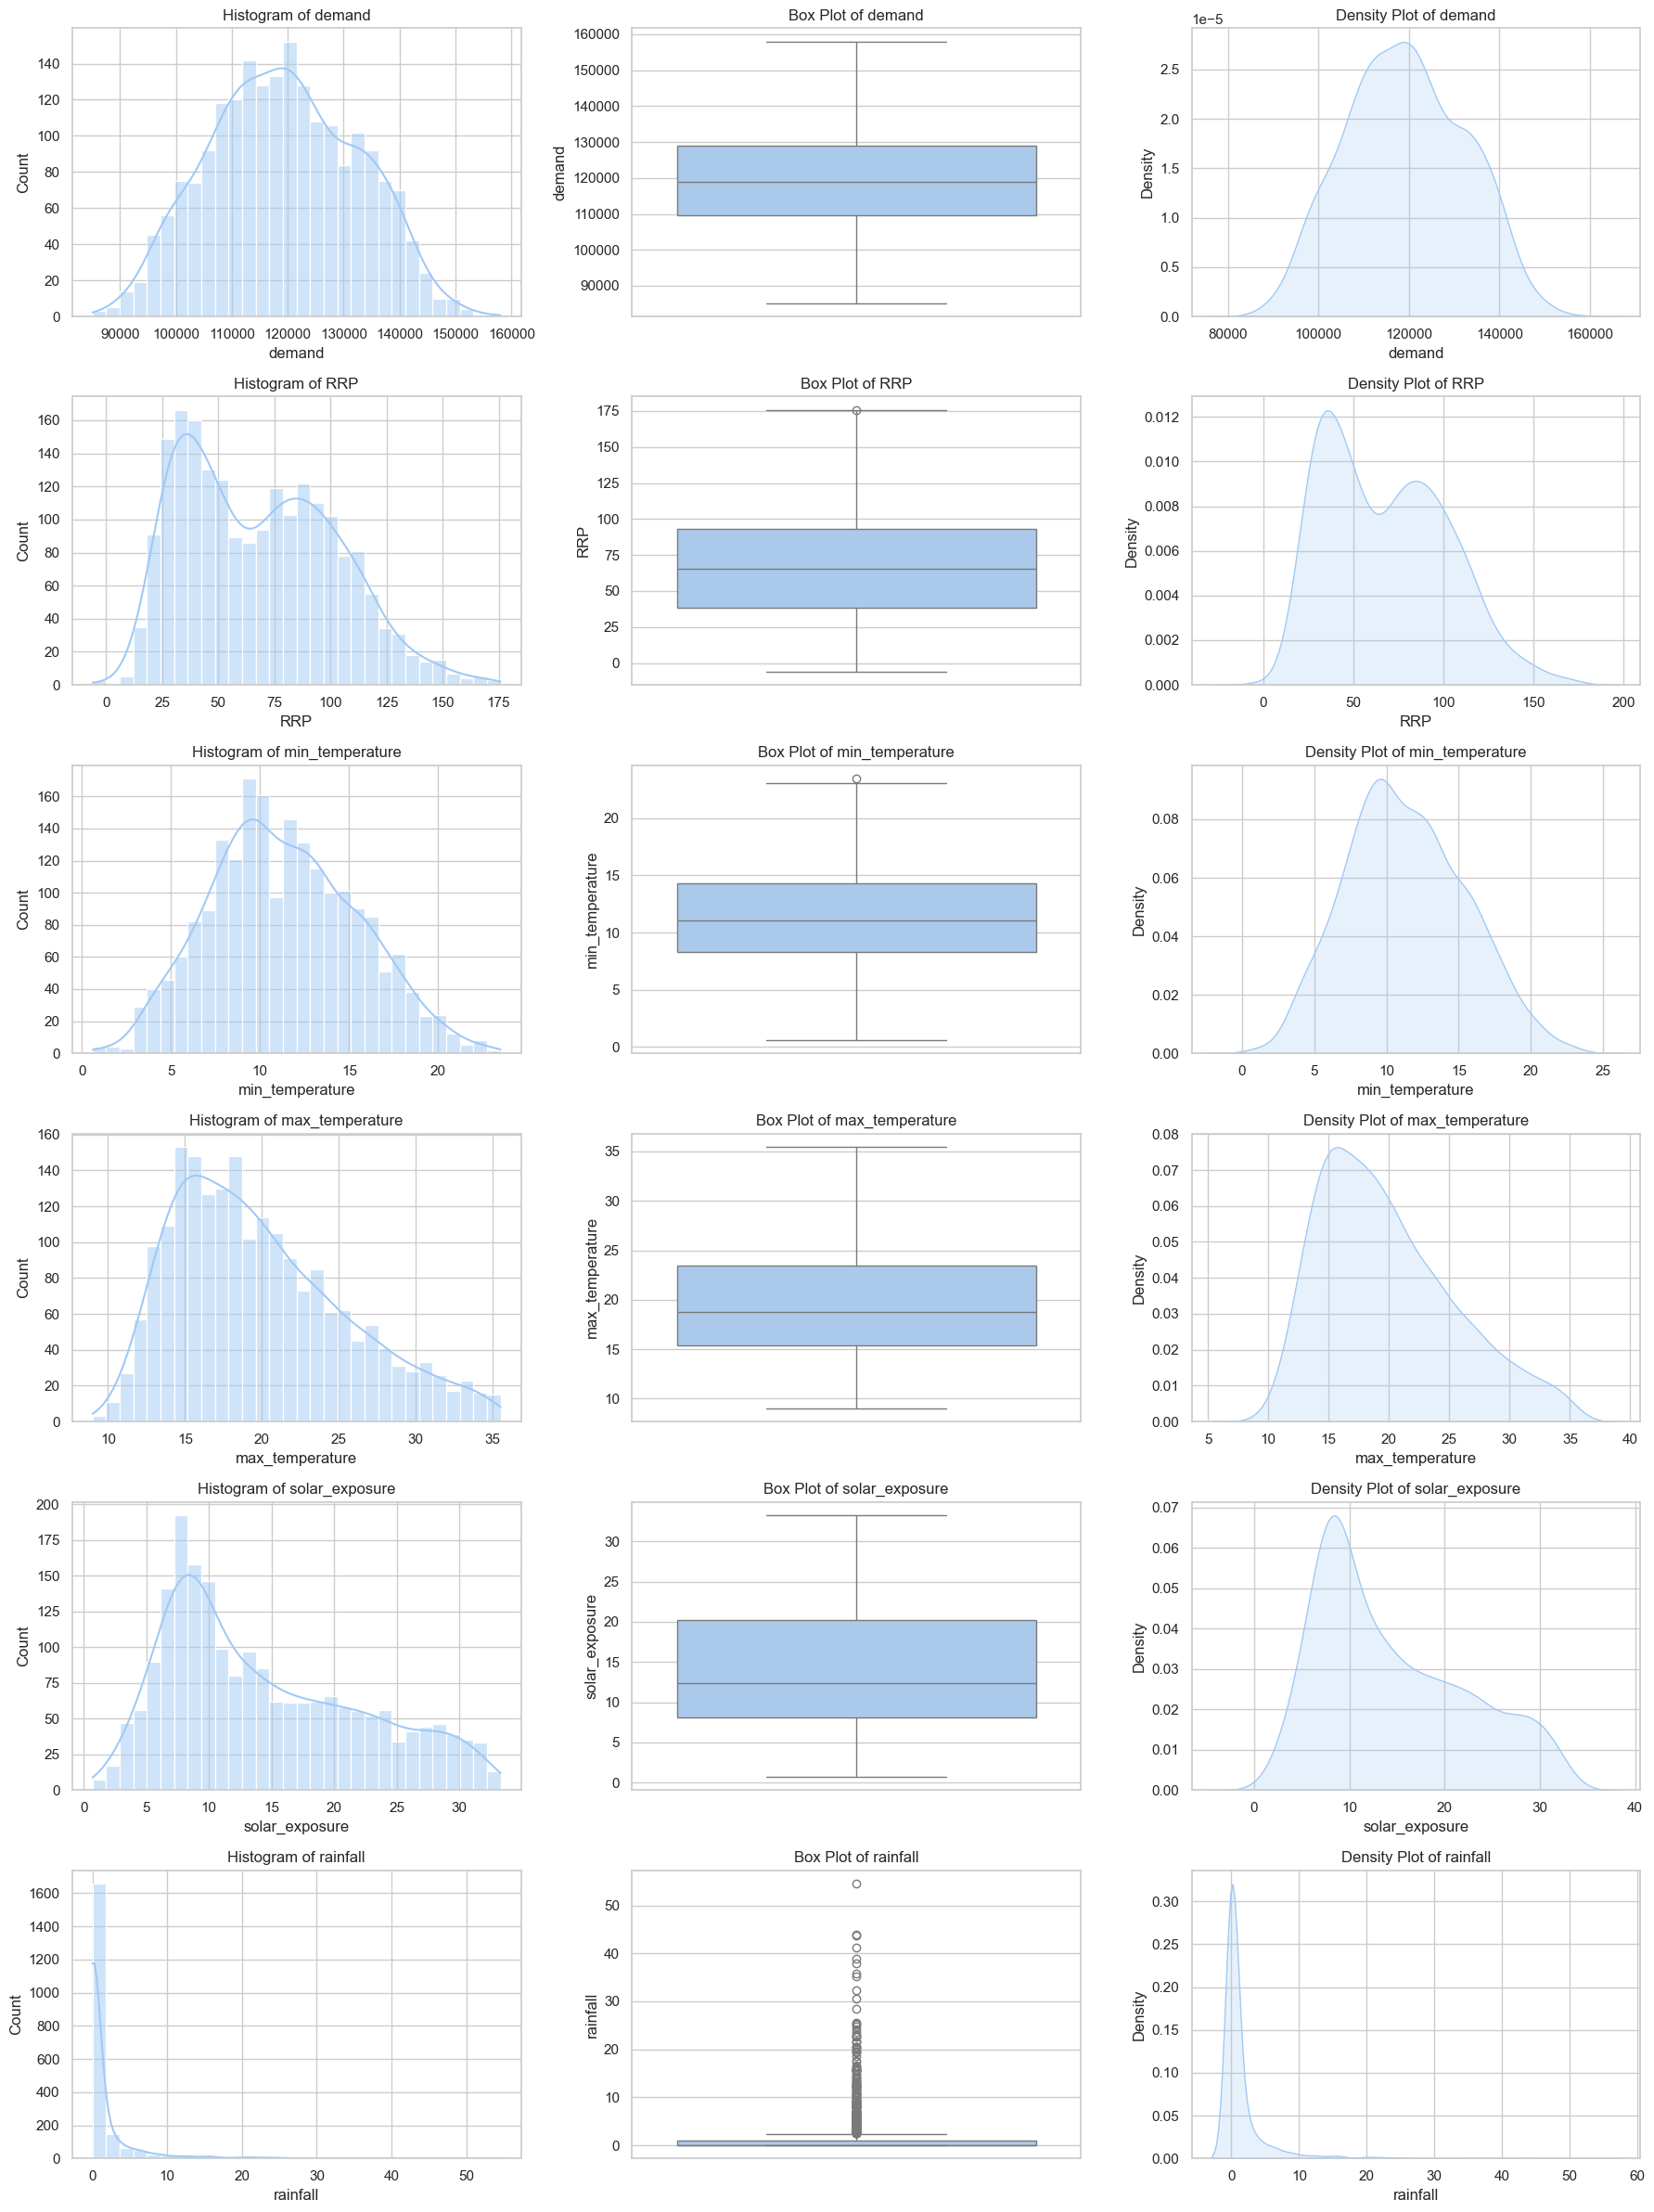

In [78]:
fig, axes = plt.subplots(len(numerical_vars), 3, figsize=(18, 4 * len(numerical_vars)))

for i, var in enumerate(numerical_vars):
    # Histogram
    sns.histplot(df_cleaned[var].dropna(), bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {var}')
    
    # Box Plot
    sns.boxplot(y=df_cleaned[var].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {var}')
    
    # KDE Density Plot (only if sufficient unique values exist)
    if df_cleaned[var].nunique() > 1:
        sns.kdeplot(df_cleaned[var].dropna(), fill=True, ax=axes[i, 2])
        axes[i, 2].set_title(f'Density Plot of {var}')
    else:
        axes[i, 2].set_title(f'Insufficient Data for KDE: {var}')

plt.tight_layout()
plt.show()

### 6. Categorical Variable Analysis

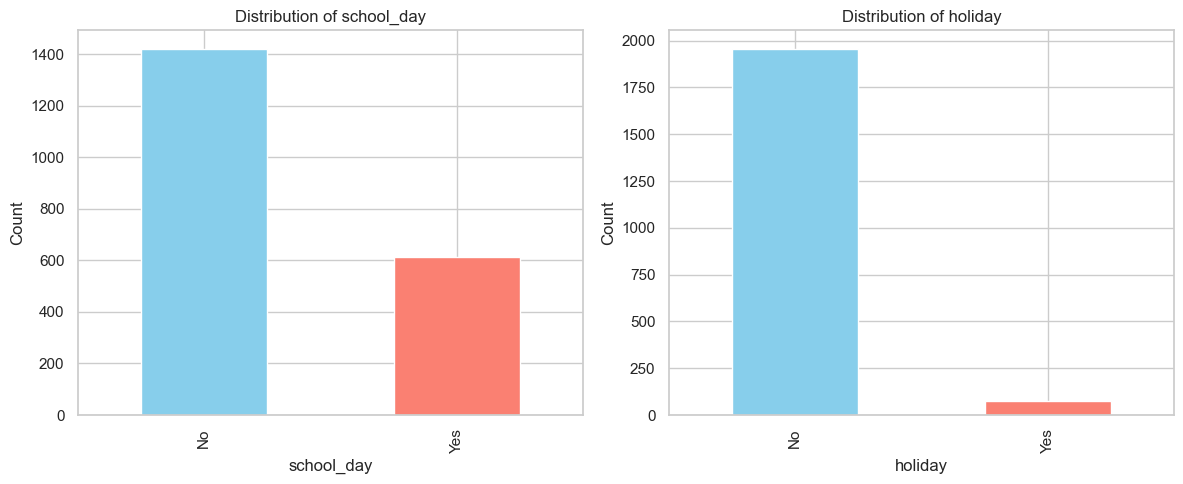

In [79]:
# Categorical Variables
categorical_vars = ['school_day', 'holiday']
fig, ax = plt.subplots(1, len(categorical_vars), figsize=(12, 5))

for i, var in enumerate(categorical_vars):
    df_cleaned[var].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], ax=ax[i])
    ax[i].set_title(f'Distribution of {var}')
    ax[i].set_xlabel(var)
    ax[i].set_ylabel('Count')
    ax[i].set_xticks([0, 1])
    ax[i].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

### 7. Correlation Heatmap (Demand vs. Weather Factors)

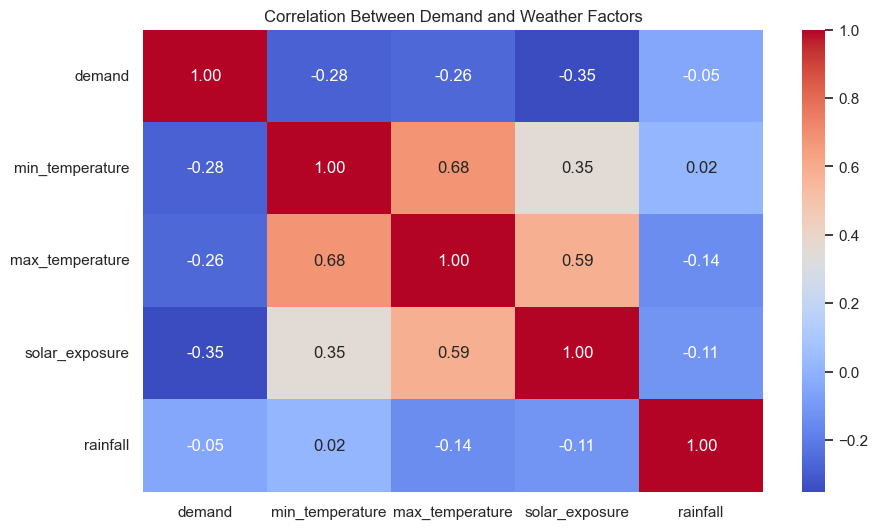

In [80]:
# Weather Impact Analysis
# Correlation Heatmap
df_weather = df_cleaned[['demand', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']]
plt.figure(figsize=(10, 6))
sns.heatmap(df_weather.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Demand and Weather Factors')
plt.show()


### 8. Scatter Plots (Demand vs. Weather Factors)

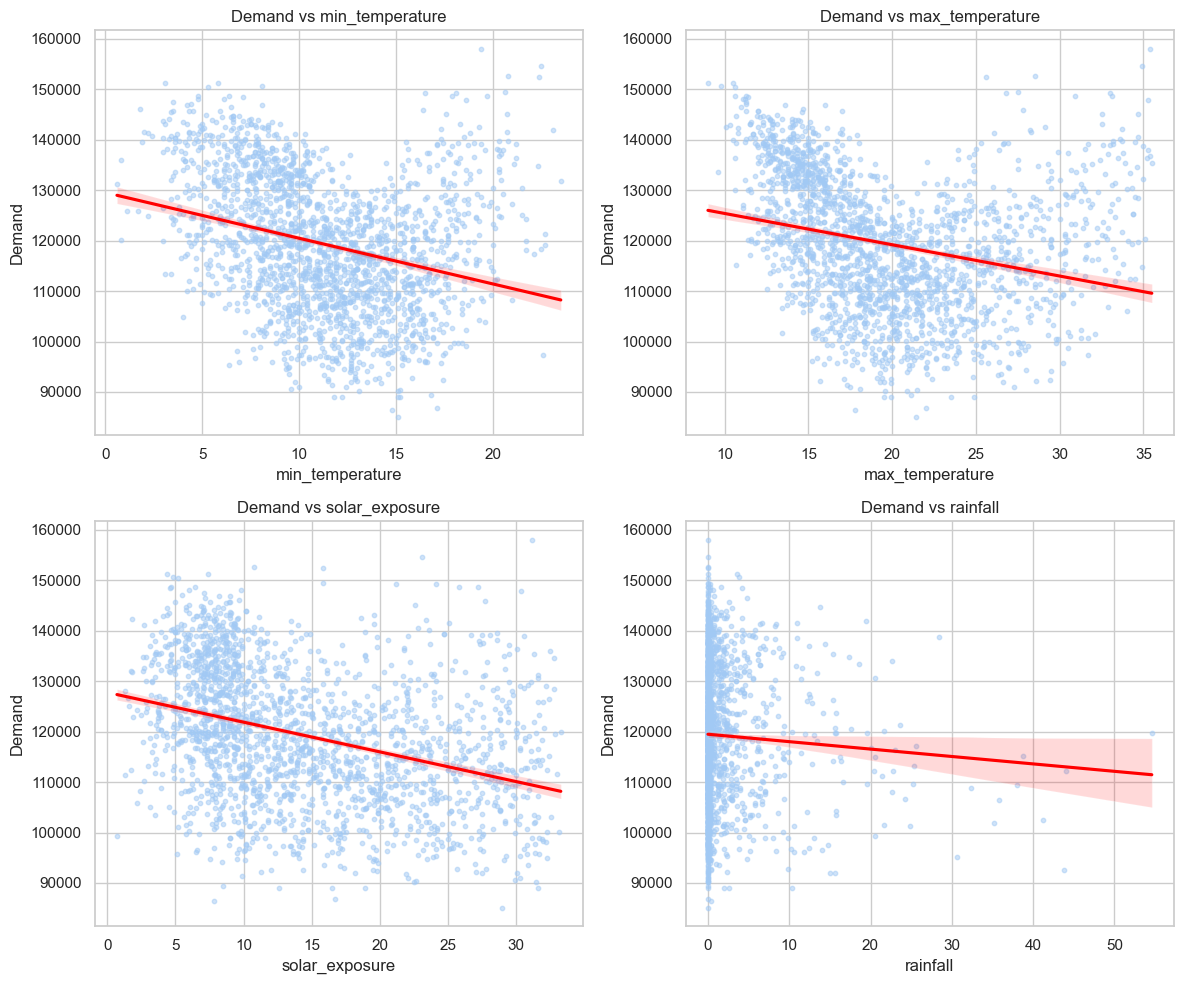

In [81]:
# Scatter Plots with Regression Lines
weather_vars = ['min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(weather_vars):
    valid_data = df_cleaned[[var, 'demand']].dropna()
    if not valid_data.empty:
        sns.regplot(x=valid_data[var], y=valid_data['demand'], ax=axes[i], scatter_kws={'alpha':0.5, 's':10}, line_kws={'color':'red'})
    axes[i].set_title(f'Demand vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Demand')

plt.tight_layout()
plt.show()

### 9. Season Classification

In [82]:
# First convert the index to datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned.set_index('date', inplace=True)


# Now extract month and assign seasons
df_cleaned['month'] = df_cleaned.index.month
df_cleaned['season'] = df_cleaned['month'].map({
    12: 'Summer', 1: 'Summer', 2: 'Summer',
    3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
    6: 'Winter', 7: 'Winter', 8: 'Winter',
    9: 'Spring', 10: 'Spring', 11: 'Spring'
})

# Rest of your code remains the same
# Check if all seasons exist
print("Unique Seasons:", df_cleaned['season'].unique())
print("Season Counts:\n", df_cleaned['season'].value_counts())

# Check month distribution
print("Month Counts:\n", df_cleaned['month'].value_counts())

Unique Seasons: ['Summer' 'Autumn' 'Winter' 'Spring']
Season Counts:
 season
Winter    548
Autumn    547
Spring    487
Summer    451
Name: count, dtype: int64
Month Counts:
 month
5     186
7     185
8     184
3     181
4     180
6     179
9     179
10    160
2     159
1     157
11    148
12    135
Name: count, dtype: int64


### 10. Electricity Demand by Season

C:\Users\saina\AppData\Local\Temp\ipykernel_17632\1907489123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='demand', data=df_cleaned,


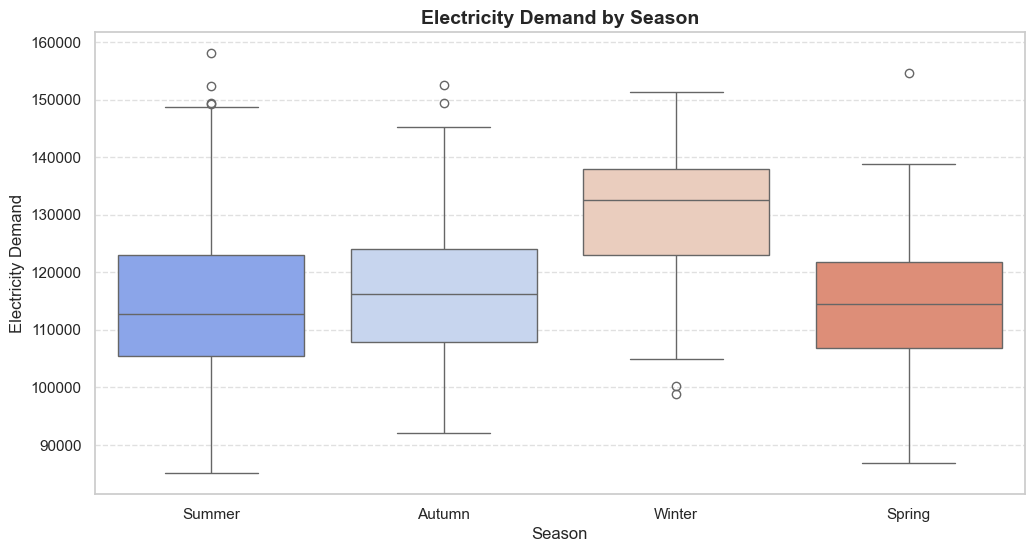

In [83]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='demand', data=df_cleaned, 
            order=['Summer', 'Autumn', 'Winter', 'Spring'], 
            palette='coolwarm')

plt.title('Electricity Demand by Season', fontsize=14, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Electricity Demand', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##  To analyze Operational Efficiency & Special Event Impact, we need to:

### 1️⃣ Study How Holidays & School Days 


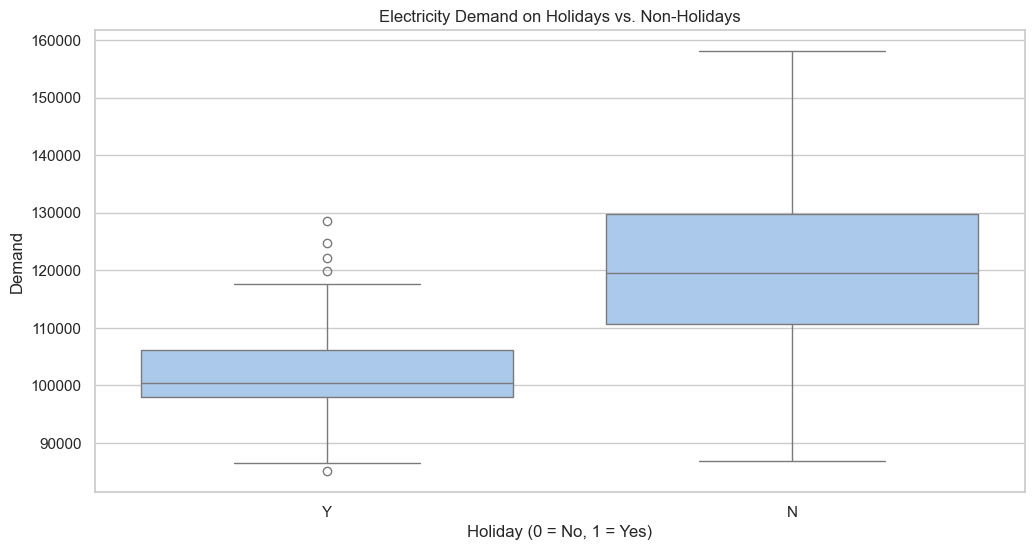

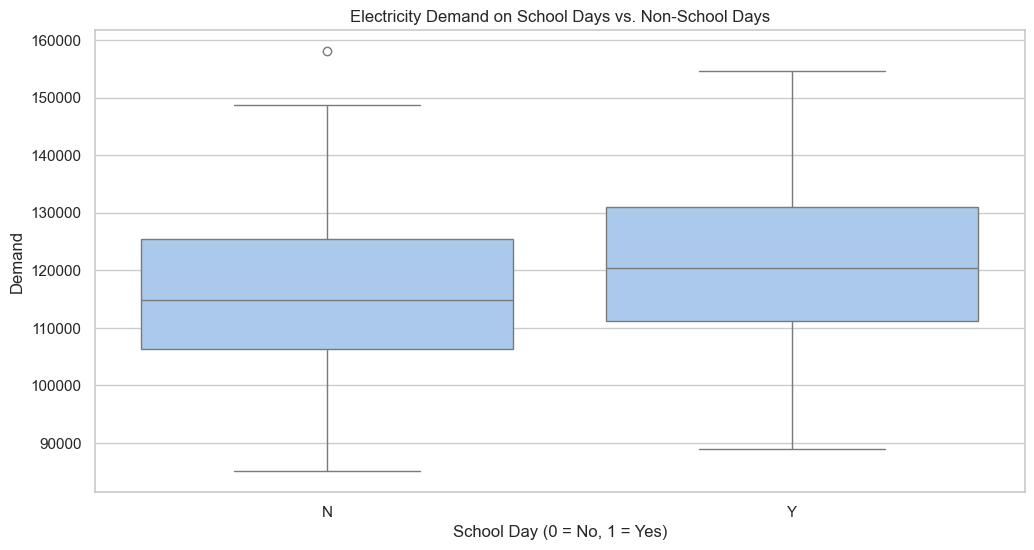

In [84]:
# Impact of Holidays and School Days on Demand
plt.figure(figsize=(12, 6))
sns.boxplot(x='holiday', y='demand', data=df_cleaned)
plt.title('Electricity Demand on Holidays vs. Non-Holidays')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Demand')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='school_day', y='demand', data=df_cleaned)
plt.title('Electricity Demand on School Days vs. Non-School Days')
plt.xlabel('School Day (0 = No, 1 = Yes)')
plt.ylabel('Demand')
plt.show()

# Anomaly Detection in Electricity Demand
### 1. Ensuring Date Index Format

In [85]:
df_cleaned.index = pd.to_datetime(df_cleaned.index)

### 2. Detecting Anomalies Using Z-Score

In [86]:
# Compute Z-score for anomaly detection
df_cleaned['demand_zscore'] = np.abs((df_cleaned['demand'] - df_cleaned['demand'].mean()) / df_cleaned['demand'].std())

# Lower the threshold to detect more anomalies
df_cleaned['is_anomaly'] = df_cleaned['demand_zscore'] > 2.0  # Lowered from 2.5


### 3. Debugging Anomaly Detection

In [87]:
# DEBUG: Print detected anomalies
print(df_cleaned[df_cleaned['is_anomaly']])
print(f"Total anomalies detected: {df_cleaned['is_anomaly'].sum()}")


                demand         RRP  demand_pos_RRP  RRP_positive  \
date                                                               
2015-01-21  148702.505   34.443415      148702.505     34.443415   
2015-02-10  145948.565   37.522600      145948.565     37.522600   
2015-02-11  149322.850   32.655454      149322.850     32.655454   
2015-06-02  148534.505   59.856033      148534.505     59.856033   
2015-06-03  146902.950   50.562684      146902.950     50.562684   
2015-06-04  147155.265   33.050285      147155.265     33.050285   
2015-07-03  145713.810   42.629576      145713.810     42.629576   
2015-07-14  150671.105   45.255583      150671.105     45.255583   
2015-07-15  151270.540   50.497418      151270.540     50.497418   
2015-07-20  146154.370   41.796713      146154.370     41.796713   
2015-08-04  147550.185   44.673336      147550.185     44.673336   
2015-08-18  148093.960   45.286687      148093.960     45.286687   
2015-12-18  158052.890   81.192486      158052.8

### 4. Visualizing Electricity Demand with Anomalies Highlighted

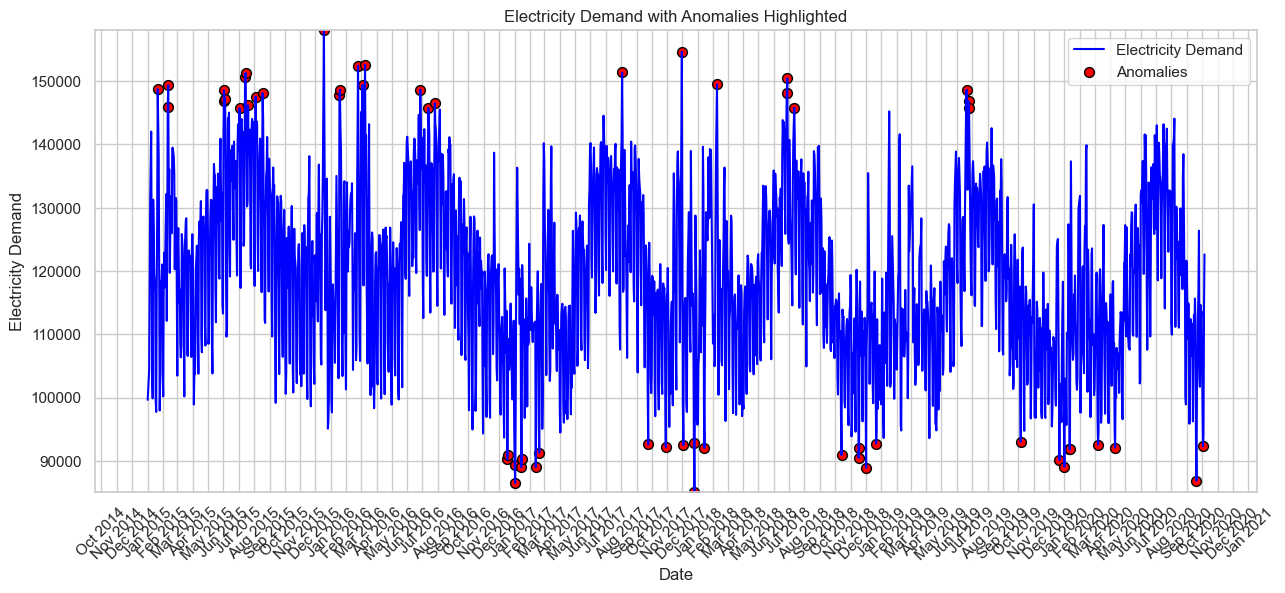

In [88]:
# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(df_cleaned.index, df_cleaned['demand'], label='Electricity Demand', color='blue')

# Highlight anomalies if any exist
anomalies = df_cleaned[df_cleaned['is_anomaly']]
if not anomalies.empty:
    plt.scatter(anomalies.index, anomalies['demand'], color='red', label='Anomalies', s=50, edgecolors='black')

# Formatting the x-axis for seasonality
plt.xlabel('Date')
plt.ylabel('Electricity Demand')
plt.title('Electricity Demand with Anomalies Highlighted')
plt.legend()

# Ensure all months are displayed on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)

# Adjust Y-limits dynamically
plt.ylim(df_cleaned['demand'].min() - 10, df_cleaned['demand'].max() + 10)

plt.grid(True)
plt.show()

### 5. Revenue and Cost Optimization

C:\Users\saina\AppData\Local\Temp\ipykernel_17632\171858415.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='RRP', data=df_cleaned, order=['Summer', 'Autumn', 'Winter', 'Spring'], palette='coolwarm')


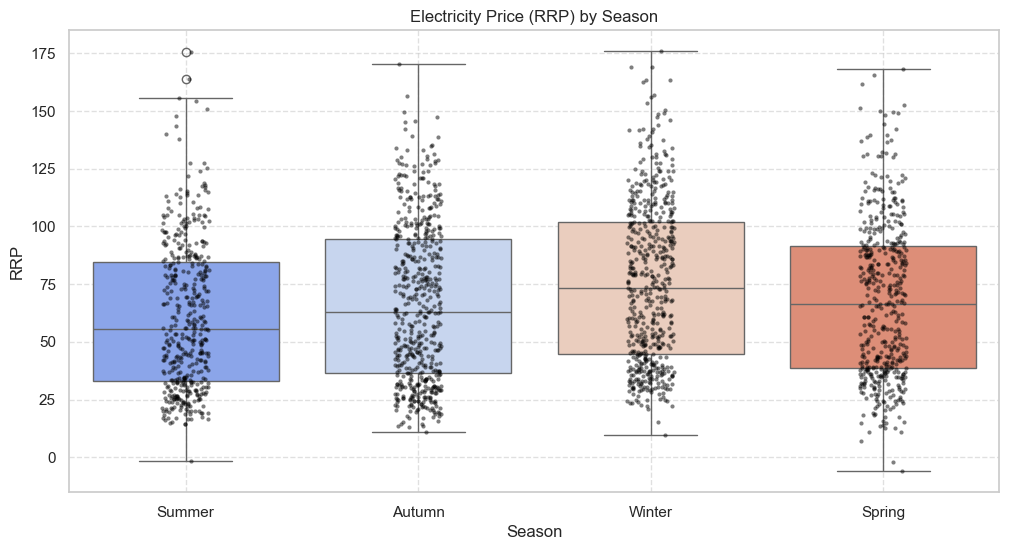

In [89]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='RRP', data=df_cleaned, order=['Summer', 'Autumn', 'Winter', 'Spring'], palette='coolwarm')
sns.stripplot(x='season', y='RRP', data=df_cleaned, color="black", alpha=0.5, size=3, jitter=True)
plt.title('Electricity Price (RRP) by Season')
plt.xlabel('Season')
plt.ylabel('RRP')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Electricity RRP Analysis with Negative RRP Periods Highlighted

### 1. Convert Index to DateTime

In [90]:
df_cleaned.index = pd.to_datetime(df_cleaned.index)

### 2. Extract Unique Years from Dataset

In [91]:
unique_years = sorted(df_cleaned.index.year.unique())

### 3. Plotting RRP Over Time & Highlighting Negative RRP Periods

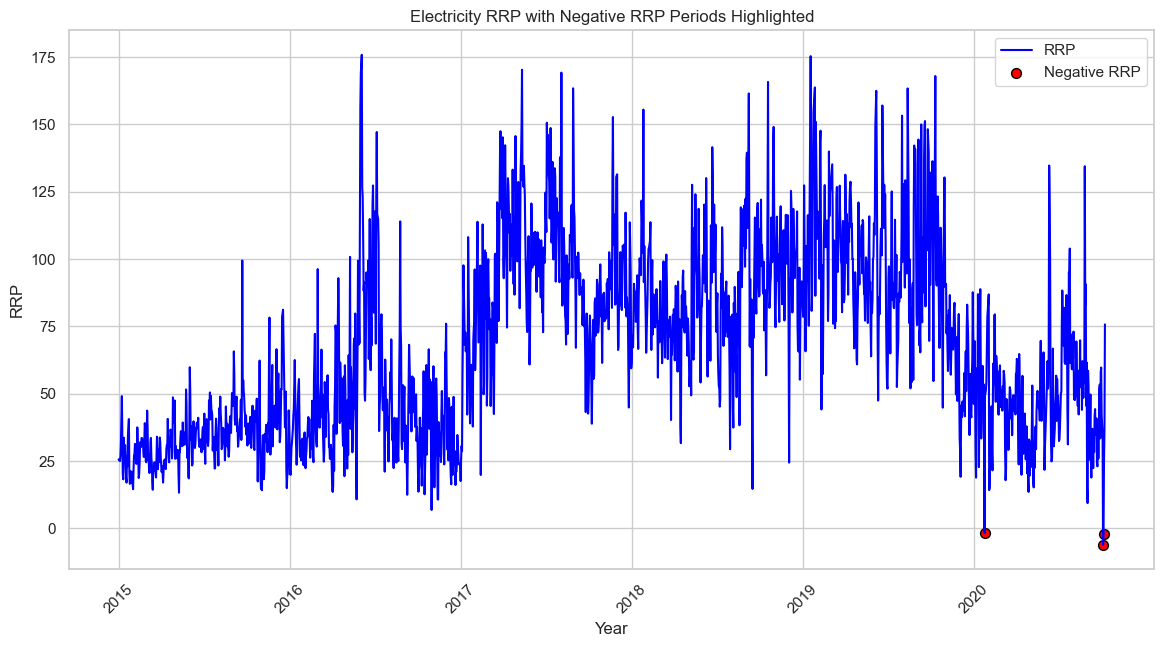

In [92]:
# Plot RRP, highlighting periods with negative RRP
plt.figure(figsize=(14, 7))
plt.plot(df_cleaned.index, df_cleaned['RRP'], label='RRP', color='blue')

# Highlight negative RRP periods
negative_rrp = df_cleaned[df_cleaned['RRP'] < 0]
plt.scatter(negative_rrp.index, negative_rrp['RRP'], color='red', label='Negative RRP', s=50, edgecolors='black')
plt.title('Electricity RRP with Negative RRP Periods Highlighted')
plt.xlabel('Year')
plt.ylabel('RRP')

# **Ensure all years are shown on the x-axis**
plt.xticks(
    ticks=[pd.Timestamp(f"{year}-01-01") for year in unique_years],  # Explicitly set all years
    labels=unique_years,
    rotation=45
)

# Optionally, use major tick formatting for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.grid(True)
plt.show()
